In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mobility_df = pd.read_csv('차량 연비 데이터(2002~2022).csv')

In [4]:
# 클래스 명 통일
mobility_df['VEHICLE CLASS'] = mobility_df['VEHICLE CLASS'].str.replace('-', '').str.upper().str.replace(':','').str.replace(' ','')

# 클래스 별 그룹화
mobility_df['CLASS GROUP'] = mobility_df['VEHICLE CLASS'].replace({
'SUBCOMPACT' : 'CAR',
'MINICOMPACT' : 'CAR',
'COMPACT' : 'CAR',
'MIDSIZE' : 'CAR',
'FULLSIZE' : 'CAR',
'TWOSEATER' : 'CAR',
'SUV' : 'SUV',
'SUVSMALL' : 'SUV',
'SUVSTANDARD' : 'SUV',
'PICKUPTRUCKSTANDARD' : 'TRUCK',
'PICKUPTRUCKSMALL' : 'TRUCK',
'VANCARGO' : 'VAN',
'VANPASSENGER' : 'VAN',
'MINIVAN' : 'VAN',
'STATIONWAGONSMALL' : 'WAGON',
'STATIONWAGONMIDSIZE' : 'WAGON',
'SPECIALPURPOSEVEHICLE' : 'SPECIAL'
})

# 연비를 km/L로 변환
mobility_df['CITY (km/L)'] = (100 / mobility_df['CITY (L/100 km)']).round(2)
mobility_df['HWY (km/L)'] = (100 / mobility_df['HWY (L/100 km)']).round(2)
mobility_df['COMB (km/L)'] = (100 / mobility_df['COMB (L/100 km)']).round(2)

# 제조사 명 대문자로 통일
mobility_df['MAKE'] = mobility_df['MAKE'].str.upper().str.replace('-','').str.replace(' ','')

# 연료 이름 변경
mobility_df['FUEL'] = mobility_df['FUEL'].replace({
'X' : 'Gasoline',
'Z' : 'Premium',
'D' : 'Diesel',
'E' : 'Ethanol',
'N' : 'Natural Gas'
})

# 엔진 사이즈 그룹화
mobility_df['ENGINE GROUP'] = mobility_df['ENGINE SIZE'].map(lambda x: '0~1' if x < 1
else('1~2' if x < 2
else('2~3' if x < 3
else('3~4' if x < 4
else('4~5' if x < 5
else('5~6' if x < 6
else('6~7' if x < 7
else'7~')))))))

# 엔진 사이즈 상위 하위 20% 그룹화
mobility_df['ENGINE SML'] = mobility_df['ENGINE SIZE'].map(lambda x: 'SMALL(bottom 20%)' if x <= 2
else ('MIDDLE' if x < 4.6
else 'LARGE(top 20%)'))

# 실린더 상위 하위 20% 그룹화
mobility_df['CYLINDERS GROUP'] = mobility_df['CYLINDERS'].map(lambda x: 'LOWER' if x <= 4
else ('MIDDLE' if x < 8
else 'UPPER'))


# 디젤게이트 구분: RED-연루 YELLOW-의혹 GREEN-청렴
mobility_df['DIESEL GATE'] = mobility_df['MAKE'].replace({
'CHEVROLET': 'GREEN',
'FORD' : 'GREEN',
'BMW' : 'RED',
'GMC' : 'GREEN',
'MERCEDESBENZ' : 'RED',
'TOYOTA' : 'YELLOW',
'PORSCHE' : 'RED',
'DODGE' : 'RED',
'AUDI' : 'RED',
'NISSAN' : 'YELLOW',
'VOLKSWAGEN' : 'RED ',
'MAZDA' : 'YELLOW',
'HYUNDAI' : 'YELLOW',
'HONDA' : 'YELLOW',
'JEEP' : 'RED',
'KIA' : 'YELLOW',
'SUBARU' : 'YELLOW',
'VOLVO' : 'GREEN',
'LEXUS' : 'YELLOW',
'CADILLAC' : 'GREEN',
'CHRYSLER' : 'RED',
'MINI' : 'GREEN',
'JAGUAR' : 'GREEN',
'MITSUBISHI' : 'YELLOW',
'INFINITI' : 'YELLOW',
'BUICK' : 'GREEN',
'PONTIAC' : 'GREEN',
'ACURA' : 'YELLOW',
'LINCOLN' : 'GREEN',
'SUZUKI' : 'YELLOW',
'SAAB' : 'GREEN',
'LANDROVER' : 'GREEN',
'SATURN' : 'GREEN',
'RAM' : 'RED',
'MASERATI' : 'RED',
'BENTLEY' : 'RED',
'LAMBORGHINI' : 'RED',
'ROLLSROYCE' : 'GREEN',
'ASTONMARTIN' : 'GREEN',
'FIAT' : 'RED',
'FERRARI' : 'GREEN',
'SCION' : 'GREEN',
'GENESIS' : 'GREEN',
'ALFAROMEO' : 'GREEN',
'OLDSMOBILE' : 'GREEN',
'DAEWOO' : 'GREEN',
'SMART' : 'GREEN',
'HUMMER' : 'GREEN',
'ISUZU' : 'GREEN',
'BUGATTI' : 'RED',
'SRT' : 'GREEN',
'PLYMOUTH' : 'GREEN'
})

# TRANSMISSION 컬럼 prefix(변속기 종류), gear(기어 수) 컬럼으로 분할
mobility_df["PREFIX"] = mobility_df["TRANSMISSION"].str.extract(r"([A-Z]+)")
mobility_df["GEAR"] = mobility_df["TRANSMISSION"].str.extract(r"(\d+)").astype(float)

# 차량 나이
mobility_df['CAR AGE'] = 2022 - mobility_df['YEAR']

# 열 순서 정리
mobility_df = mobility_df[['YEAR' , 'CAR AGE', 'MAKE', 'DIESEL GATE', 'CLASS GROUP', 'VEHICLE CLASS', 'ENGINE SML', 'ENGINE GROUP', 'ENGINE SIZE', 'CYLINDERS GROUP', 'CYLINDERS', 'TRANSMISSION', "PREFIX", "GEAR", 'FUEL', 'CITY (km/L)', 'HWY (km/L)', 'COMB (km/L)', 'COMB (mpg)', 'EMISSIONS']]

# 연료, 그룹별 색깔 지정
palette_ip = {
    "Gasoline": "#4C72B0",
    "Premium": "#DD8452",
    "Ethanol": "#55A868",
    "Natural Gas": "#C44E52",
    "Diesel": "#8C8C8C",
    "SUV": "#8172B3",
    "TRUCK": "#DA8BC3",
    "WAGON": "#937860",
    "SPECIAL": "#E2A458",
    "CAR": "#64B5CD",
    "VAN": "#4E9A06"

}

In [9]:
mobility_df.columns

Index(['YEAR', 'CAR AGE', 'MAKE', 'DIESEL GATE', 'CLASS GROUP',
       'VEHICLE CLASS', 'ENGINE SML', 'ENGINE GROUP', 'ENGINE SIZE',
       'CYLINDERS GROUP', 'CYLINDERS', 'TRANSMISSION', 'PREFIX', 'GEAR',
       'FUEL', 'CITY (km/L)', 'HWY (km/L)', 'COMB (km/L)', 'COMB (mpg)',
       'EMISSIONS'],
      dtype='object')

In [21]:
mobility_df['VEHICLE CLASS'].unique()

mobility_df[mobility_df['VEHICLE CLASS'] == 'TWOSEATER'].count

<bound method DataFrame.count of        YEAR  CAR AGE     MAKE DIESEL GATE CLASS GROUP VEHICLE CLASS  \
29     2000       22     AUDI         RED         CAR     TWOSEATER   
30     2000       22     AUDI         RED         CAR     TWOSEATER   
51     2000       22      BMW         RED         CAR     TWOSEATER   
59     2000       22      BMW         RED         CAR     TWOSEATER   
209    2000       22  FERRARI       GREEN         CAR     TWOSEATER   
...     ...      ...      ...         ...         ...           ...   
22374  2022        0  PORSCHE         RED         CAR     TWOSEATER   
22375  2022        0  PORSCHE         RED         CAR     TWOSEATER   
22376  2022        0  PORSCHE         RED         CAR     TWOSEATER   
22501  2022        0   TOYOTA      YELLOW         CAR     TWOSEATER   
22502  2022        0   TOYOTA      YELLOW         CAR     TWOSEATER   

              ENGINE SML ENGINE GROUP  ENGINE SIZE CYLINDERS GROUP  CYLINDERS  \
29     SMALL(bottom 20%)         

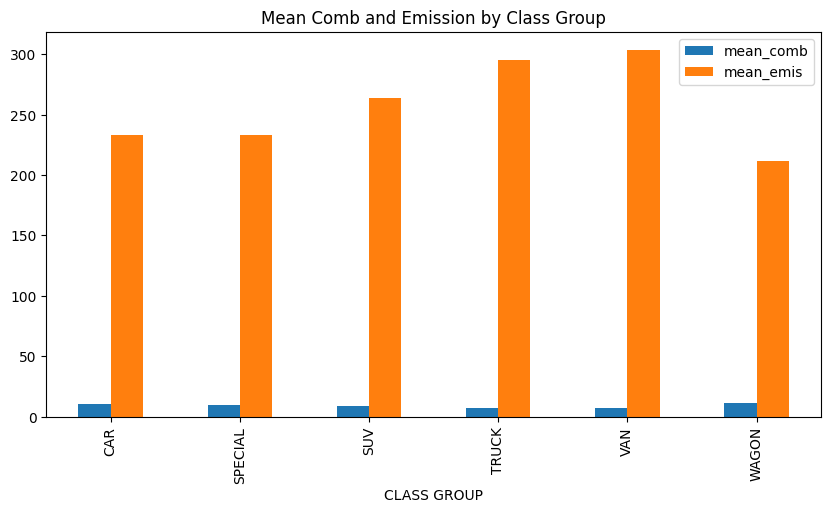

In [27]:
class_summary = mobility_df.groupby("CLASS GROUP").agg(
    mean_comb=('COMB (km/L)',"mean"),
    mean_emis=("EMISSIONS","mean")
).reset_index()

class_summary.plot(x="CLASS GROUP", y=["mean_comb","mean_emis"], kind="bar", figsize=(10,5))
plt.title("Mean Comb and Emission by Class Group")
plt.show()


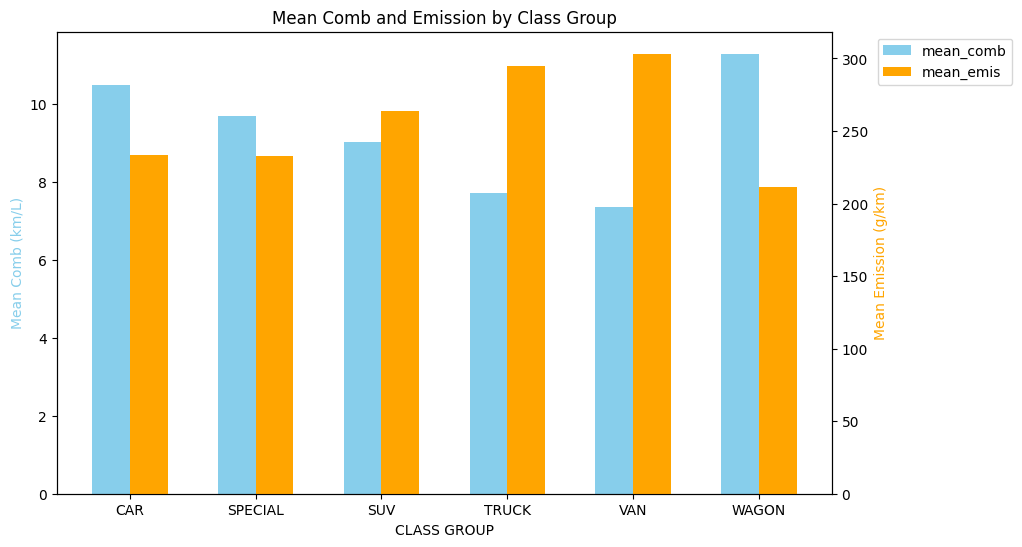

In [39]:

import numpy as np

x = np.arange(len(class_summary["CLASS GROUP"]))
width = 0.3

fig, ax1 = plt.subplots(figsize=(10,6))

# 첫 번째 y축: 평균 연비
ax1.bar(x - width/2, class_summary["mean_comb"], width, label="mean_comb", color="skyblue")
ax1.set_ylabel("Mean Comb (km/L)", color="skyblue")
ax1.set_xlabel("CLASS GROUP")
ax1.set_title("Mean Comb and Emission by Class Group")
ax1.set_xticks(x)
ax1.set_xticklabels(class_summary["CLASS GROUP"])

# 두 번째 y축: 평균 배출량
ax2 = ax1.twinx()
ax2.bar(x + width/2, class_summary["mean_emis"], width, label="mean_emis", color="orange")
ax2.set_ylabel("Mean Emission (g/km)", color="orange")

# 범례 합치기
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


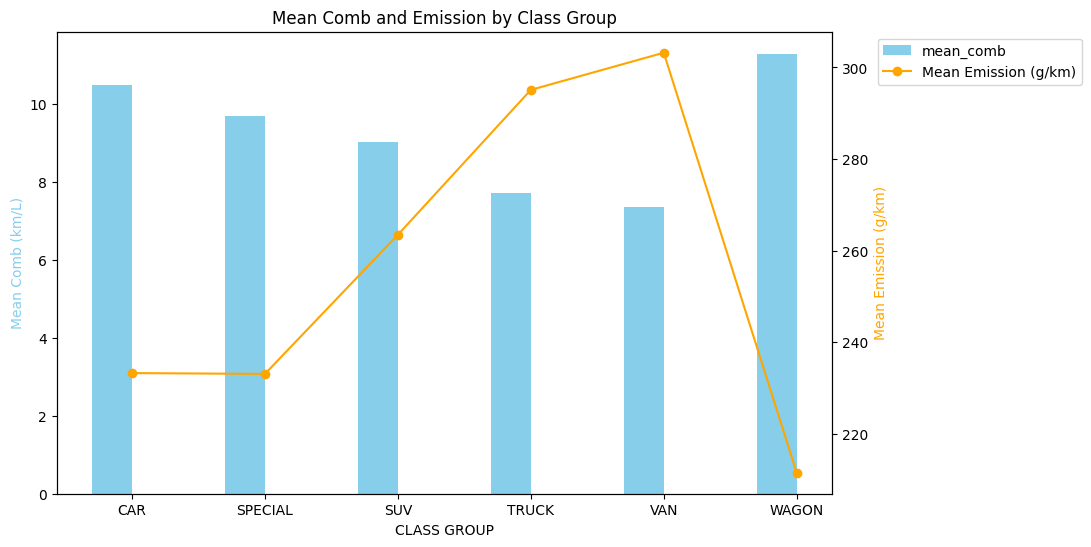

In [ ]:

import numpy as np

x = np.arange(len(class_summary["CLASS GROUP"]))
x_idx = np.arange(len(x))
width = 0.3

fig, ax1 = plt.subplots(figsize=(10,6))

# 첫 번째 y축: 평균 연비
ax1.bar(x - width/2, class_summary["mean_comb"], width, label="mean_comb", color="skyblue")
ax1.set_ylabel("Mean Comb (km/L)", color="skyblue")
ax1.set_xlabel("CLASS GROUP")
ax1.set_title("Mean Comb and Emission by Class Group")
ax1.set_xticks(x)
ax1.set_xticklabels(class_summary["CLASS GROUP"])

# 두 번째 y축: 평균 배출량
ax2 = ax1.twinx()


ax2.plot(x_idx, class_summary["mean_emis"], label="Mean Emission (g/km)", color="orange", marker="o", linewidth=2)
ax2.set_ylabel("Mean Emission (g/km)", color="orange")

# 범례 합치기
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2,bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# 연비(comb)와 배출량(emis)의 선형관계

/var/folders/mt/b5bzczgn14s85rhfsvnlr33h0000gn/T/ipykernel_40758/2280676113.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='COMB (km/L)', y='EMISSIONS', data=mobility_df, palette=palette_ip)


Text(0, 0.5, 'EMISSIONS')

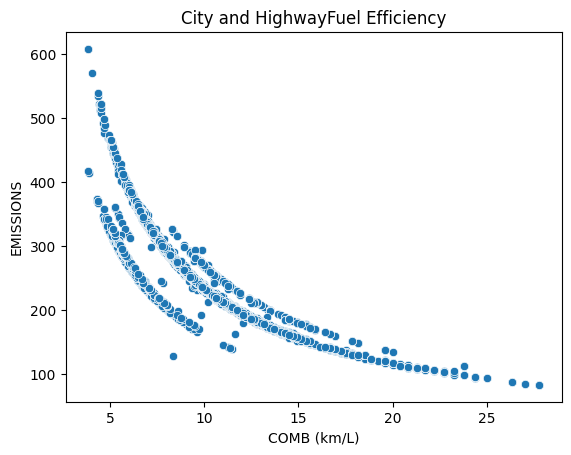

In [ ]:


import seaborn as sns


sns.scatterplot(x='COMB (km/L)', y='EMISSIONS', data=mobility_df, palette=palette_ip)


plt.title("City and HighwayFuel Efficiency")
plt.xlabel('COMB (km/L)')
plt.ylabel('EMISSIONS')

In [ ]:
mobility_df.columns

mobility_df['ENGINE SIZE'].unique()
# mobility_df['FUEL'].unique()

array([2., 3., 4., 5., 6., 1., 8., 7.])

## 디젤차량의 연도별 엔진사이즈 퍼센트

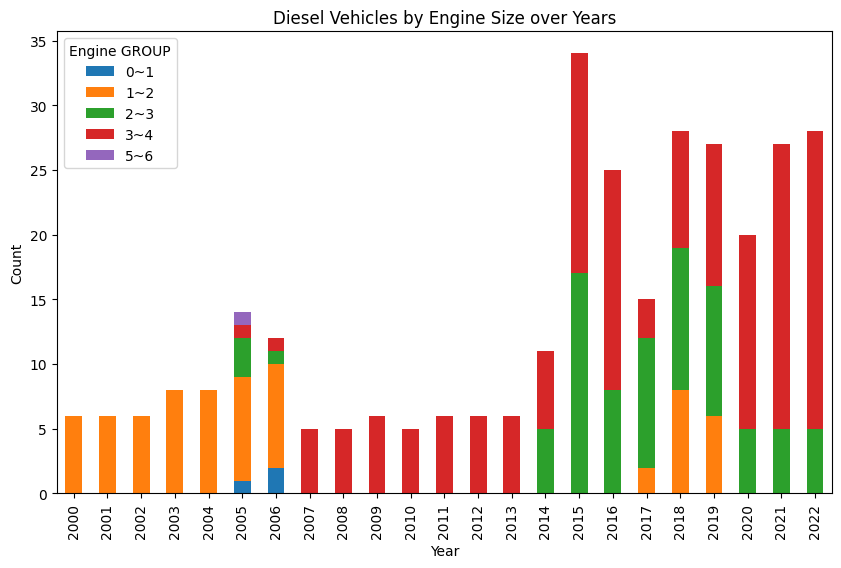

In [54]:
diesel_mobility_df = mobility_df[mobility_df['FUEL']=='Diesel']


diesel_counts = (diesel_mobility_df
                 .groupby(['YEAR','ENGINE GROUP'])['ENGINE GROUP']
                 .count()
                 .unstack(fill_value=0))


diesel_counts.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Diesel Vehicles by Engine Size over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Engine GROUP')
plt.show()


2000 - 2006 : <2 사이즈 엔진이 다수

2007 - 2013 : 3<x<4 사이즈 엔진이 다수

2014 - 2022 : 2<x<3 사이즈 엔진도 함께 가세

In [58]:
a = (mobility_df
                 .groupby(['CLASS GROUP'])['EMISSIONS']
                 .mean())
a

CLASS GROUP
CAR        233.226944
SPECIAL    233.043860
SUV        263.441102
TRUCK      295.095028
VAN        303.217517
WAGON      211.458070
Name: EMISSIONS, dtype: float64

In [70]:
mobility_df['WAGON'].unique

KeyError: 'WAGON'

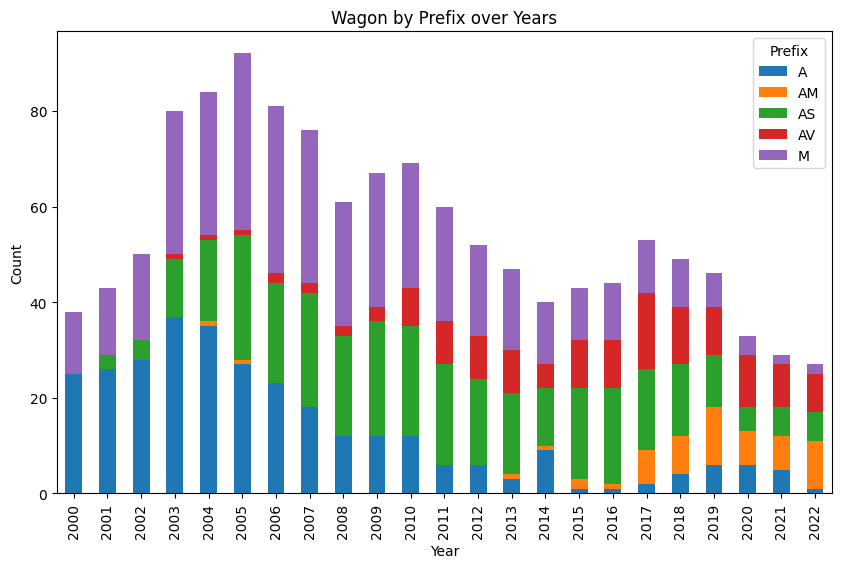

In [71]:
wagon_mobility_df = mobility_df[mobility_df['CLASS GROUP']=='WAGON']


wagon_counts = (wagon_mobility_df
                 .groupby(['YEAR','PREFIX'])['PREFIX']
                 .count()
                 .unstack(fill_value=0))


diesel_counts.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Wagon by Prefix over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Prefix')
plt.show()
